In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pathlib
import sys
from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
sys.path.append(join(dir_path, "HelperFiles"))
import helper

results_path = join(dir_path, "Experiments", "Results", "Top_K", "rank", "alpha_0.2")

In [2]:
with open(join(results_path, "rankshap_vs_ss_k2"), "rb") as fp:
    results2 = pickle.load(fp)
results2.keys()

with open(join(results_path, "rankshap_vs_ss_k5"), "rb") as fp:
    results5 = pickle.load(fp)
results5.keys()

dict_keys(['rankshap', 'ss_fixed', 'ss_adaptive', 'rankshap_n_samples', 'x_indices'])

In [3]:
def get_fwers_all_pts(all_top_Ks):
    return np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in all_top_Ks])

rankshap_fwers2 = get_fwers_all_pts(results2['rankshap'])
ss_adaptive_fwers2 = get_fwers_all_pts(results2['ss_adaptive'])
rankshap_fwers5 = get_fwers_all_pts(results5['rankshap'])
ss_adaptive_fwers5 = get_fwers_all_pts(results5['ss_adaptive'])

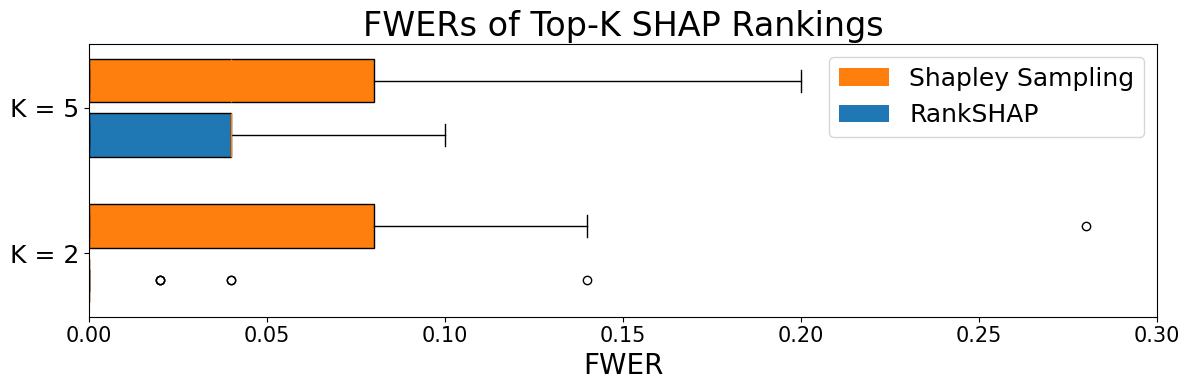

In [4]:
import matplotlib.pyplot as plt

# Simulated data for the plot based on previous assumptions
data = {
    "RankSHAP (K=2)": rankshap_fwers2,
    "SS Adaptive (K=2)": ss_adaptive_fwers2,
    "RankSHAP (K=5)": rankshap_fwers5,
    "SS Adaptive (K=5)": ss_adaptive_fwers5
}

fig, ax = plt.subplots(figsize=(12, 4))

# Plotting each group on the same axes
positions = [0.5, 1.25, 2.5, 3.25]  # Space between K=2 and K=5 boxplots for clarity
box = ax.boxplot(data.values(), positions=positions, widths=0.6, patch_artist=True, vert=False, showfliers=True)

# Adding colors to distinguish between methods
colors = ['#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customizing plot details
ax.set_title('FWERs of Top-K SHAP Rankings', fontsize=24)
ax.set_xlabel('FWER', fontsize=20)
ax.set_xlim(0, .3)
ax.set_ylim(0, np.max(positions)+.5)  # Assuming FWER scales similar to previous plots
ax.set_yticks([np.mean(positions[:2]), np.mean(positions[2:])])
ax.set_yticklabels(['K = 2', 'K = 5'], fontsize=18)
ax.tick_params(axis='x', labelsize=15)

# Adding a legend manually
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#ff7f0e', label='Shapley Sampling'),
    Patch(facecolor='#1f77b4', label='RankSHAP')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=18)

plt.tight_layout()
plt.savefig(join(dir_path, "Experiments", "Figures", "rankshap_vs_ss.pdf"), bbox_inches="tight", format="pdf")
plt.show()